In [2]:
# 1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [3]:
# 2. Ambil data housing# 2. Ambil data housing
housing_data = fetch_california_housing(as_frame=True)
housing = housing_data.frame  # DataFrame Pandas

# 3. Tampilkan info dasar
print(housing.head())
print(housing.info())
print(housing.describe())

housing_data = fetch_california_housing(as_frame=True)
housing = housing_data.frame  # DataFrame Pandas

# 3. Tampilkan info dasar
print(housing.head())
print(housing.info())
print(housing.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

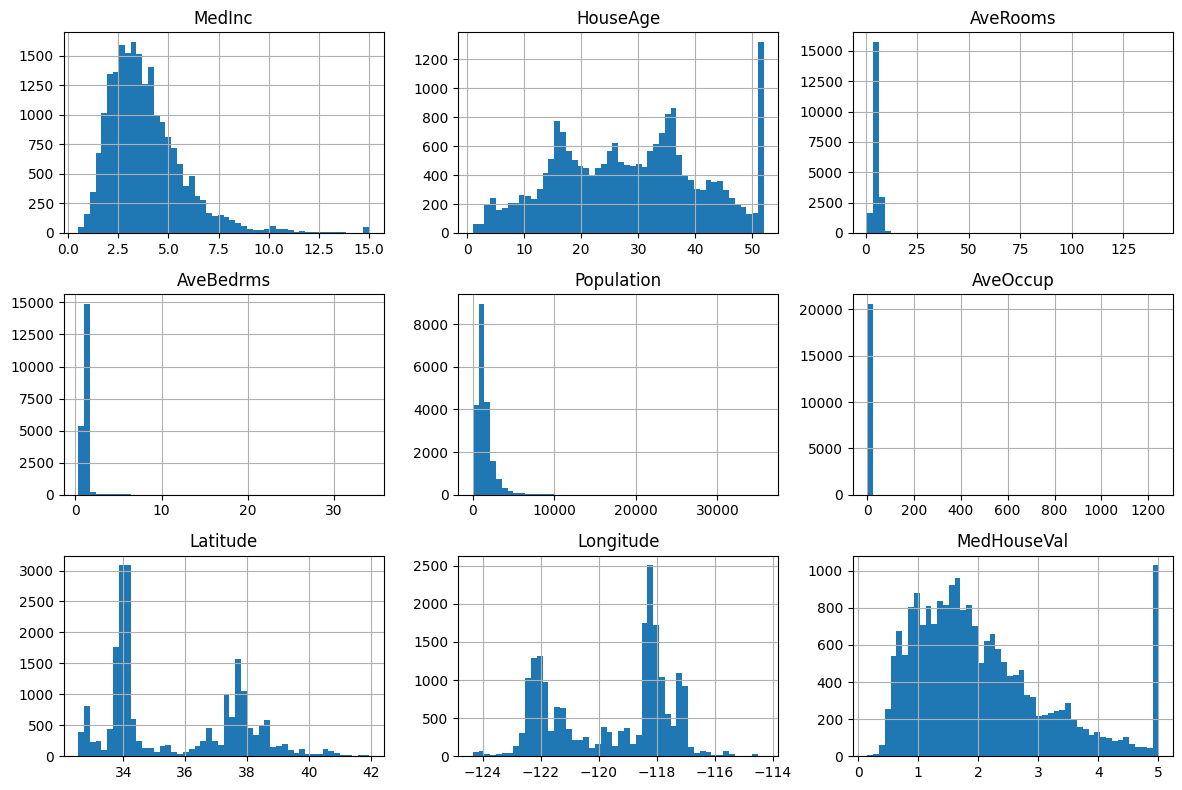

In [4]:
# 4. Visualisasi distribusi fitur
housing.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [5]:
# 5. Split data: train dan test
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Pisahkan label
housing_train = train_set.drop("MedHouseVal", axis=1)
housing_labels = train_set["MedHouseVal"].copy()

In [6]:
# 6. Buat pipeline preprocessing
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),      # Isi nilai kosong
    ('scaler', StandardScaler())                        # Normalisasi fitur
])

housing_prepared = pipeline.fit_transform(housing_train)  # Siapkan data training

In [7]:
# 7. Training model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [8]:
# 8. Evaluasi model dengan data training (cek overfitting?)
housing_predictions = model.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

print("RMSE di data training:", rmse)

RMSE di data training: 0.18798297991977747


In [9]:
# 9. Uji model di data test
X_test = test_set.drop("MedHouseVal", axis=1)
y_test = test_set["MedHouseVal"].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("RMSE di data test:", final_rmse)

RMSE di data test: 0.5051432839771741


In [10]:
# 10. Simpan model ke file
joblib.dump(model, "california_model.pkl")

['california_model.pkl']

### ✅ Penjelasan Singkat:

* `SimpleImputer` menangani **missing value** dengan median.
* `StandardScaler` memastikan semua fitur dalam skala yang sama (penting untuk sebagian besar algoritma ML).
* `RandomForestRegressor` digunakan karena cukup kuat untuk baseline dan tidak perlu scaling ekstrem.
* Model dievaluasi dengan **RMSE**, metrik umum untuk regresi.
* `joblib` menyimpan model untuk digunakan kembali nanti.